In [292]:
import pandas as pd

In [293]:
df = pd.read_csv("exoplanet_data_3.csv")

In [294]:
df = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

In [295]:
df = df.dropna()

In [301]:
df.drop(df[df.koi_disposition == "CANDIDATE"].index , inplace=True)
df.drop(df[df.koi_disposition == "NOT DISPOSITIONED"].index , inplace=True)

In [302]:
df = df.replace(["CONFIRMED","FALSE POSITIVE"],[1,0])

In [303]:
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,3.761821,0.000012,-0.000012,171.903710,0.002060,...,-157.0,4.472,0.057,-0.276,0.949,0.376,-0.089,283.31638,41.837120,15.257
1,1,0,0,0,0,49.183949,0.000038,-0.000038,141.911878,0.000639,...,-92.0,3.900,0.035,-0.035,2.192,0.121,-0.121,294.55917,46.062328,12.654
2,1,0,0,0,0,8.203969,0.000015,-0.000015,169.690690,0.001410,...,-128.0,4.499,0.074,-0.605,0.826,0.399,-0.074,286.56570,41.808399,15.376
3,1,0,0,0,0,14.496435,0.000054,-0.000054,143.415180,0.003330,...,-128.0,4.499,0.074,-0.605,0.826,0.399,-0.074,286.56570,41.808399,15.376
4,1,0,0,0,0,56.056054,0.000249,-0.000249,201.165610,0.003060,...,-66.0,4.784,0.077,-0.077,0.470,0.060,-0.060,289.50848,41.812119,15.849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,1,0,0,0,0,14.485852,0.000024,-0.000024,175.005580,0.001320,...,-87.0,4.341,0.143,-0.127,1.008,0.189,-0.145,288.69864,39.708290,13.946
5846,1,0,0,0,0,40.699444,0.000178,-0.000178,172.566830,0.003260,...,-217.0,4.175,0.208,-0.236,1.362,0.593,-0.312,292.10428,39.767910,13.949
5847,0,0,0,0,1,4.532408,0.000009,-0.000009,171.925050,0.001590,...,-144.0,4.278,0.179,-0.221,1.173,0.416,-0.228,293.08734,39.799122,13.932
5849,1,0,0,0,0,7.256965,0.000006,-0.000006,134.023293,0.000655,...,-97.0,4.113,0.022,-0.022,1.586,0.061,-0.061,294.83517,48.982361,12.702


In [304]:
# Set features. This will also be used as x values. Here all of the columns except "koi_disposition" are selected as features. 
selected_features = df.drop("koi_disposition", axis=1)
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,3.761821,0.000012,-0.000012,171.903710,0.002060,-0.002060,...,-157.0,4.472,0.057,-0.276,0.949,0.376,-0.089,283.31638,41.837120,15.257
1,0,0,0,0,49.183949,0.000038,-0.000038,141.911878,0.000639,-0.000639,...,-92.0,3.900,0.035,-0.035,2.192,0.121,-0.121,294.55917,46.062328,12.654
2,0,0,0,0,8.203969,0.000015,-0.000015,169.690690,0.001410,-0.001410,...,-128.0,4.499,0.074,-0.605,0.826,0.399,-0.074,286.56570,41.808399,15.376
3,0,0,0,0,14.496435,0.000054,-0.000054,143.415180,0.003330,-0.003330,...,-128.0,4.499,0.074,-0.605,0.826,0.399,-0.074,286.56570,41.808399,15.376
4,0,0,0,0,56.056054,0.000249,-0.000249,201.165610,0.003060,-0.003060,...,-66.0,4.784,0.077,-0.077,0.470,0.060,-0.060,289.50848,41.812119,15.849


In [305]:
#df = df.replace(["CONFIRMED","FALSE POSITIVE"],[1,0])

In [306]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df,
    table_name='exo_planet')

In [307]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=100)

/Users/piercest/anaconda3/lib/python3.11/site-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [308]:
synthetic_data = synthetic_data.sort_values(by = ["koi_disposition"])

In [309]:
import joblib
filename = 'SVC_model.sav'
svm_grid_model = joblib.load(filename)

In [310]:
RF_model = joblib.load(filename)

In [311]:
# Set features. This will also be used as x values. Here all of the columns except "koi_disposition" are selected as features. 
selected_features = synthetic_data.drop("koi_disposition", axis=1)
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
99,0,0,0,0,2.378167,1.620961e-03,-1.438711e-03,122.410195,0.027111,-0.024647,...,-168.0,4.462,0.122,-0.235,0.754,0.181,-0.128,291.90364,50.592387,7.631
23,0,1,0,0,6.843335,9.734600e-05,-7.479100e-05,142.242970,0.003746,-0.003444,...,-101.0,4.419,0.105,-0.050,1.170,0.112,-0.239,291.60530,41.592211,7.631
83,0,0,0,0,0.655621,8.400000e-08,-1.320000e-07,128.893210,0.000331,-0.000315,...,-190.0,4.538,0.107,-0.284,0.637,0.218,-0.081,294.88957,38.665481,7.631
27,0,0,0,0,28.324129,1.081906e-03,-1.276789e-03,173.002476,0.005400,-0.005116,...,-139.0,4.199,0.138,-0.256,1.485,0.418,-0.365,293.74854,39.998220,7.631
57,0,0,1,0,0.778750,2.800000e-08,-2.000000e-08,142.473338,0.000227,-0.000211,...,-165.0,3.862,0.188,-0.410,3.106,1.457,-0.911,296.78725,41.757926,7.631


In [312]:
synthetic_data = synthetic_data.replace(["CONFIRMED","FALSE POSITIVE"],[1,0])

In [313]:
X = selected_features
y = pd.DataFrame(synthetic_data["koi_disposition"],index = synthetic_data.index)

In [314]:
X.shape

(100, 40)

In [315]:
y.shape

(100, 1)

In [316]:
scaler_filename = "scaler.save"

scaler = joblib.load(scaler_filename) 

In [317]:
X_scaled = scaler.transform(X)


/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [318]:
SVC_model = joblib.load("SVC_model.sav")
RF_model = joblib.load("RF_model.sav")

In [319]:
prediction_SVC = SVC_model.predict(X_scaled)
prediction_RF = RF_model.predict(X_scaled)

In [320]:
# main_script.py
from ensemble_model import ensemble_predictions

# Use the ensemble function from ensemble_model.py
ensembled_preds = ensemble_predictions(prediction_RF, prediction_SVC)

              precision    recall  f1-score   support

           0       0.39      0.53      0.45        30
           1       0.76      0.64      0.70        70

    accuracy                           0.61       100
   macro avg       0.58      0.59      0.57       100
weighted avg       0.65      0.61      0.62       100



/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/piercest/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

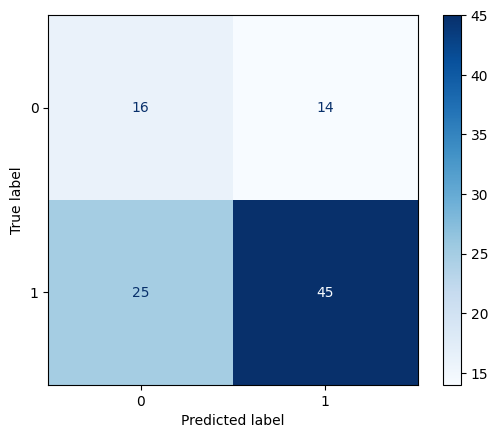

In [321]:
# Evaluate the model
print(classification_report(y, ensembled_preds))

# Compute confusion matrix
cm = confusion_matrix(y, ensembled_preds, labels=SVC_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [322]:
y

,koi_disposition
99,0
23,0
83,0
27,0
57,0
...,...
36,1
35,1
32,1
58,1


In [323]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
99,0,0,0,0,2.378167,1.620961e-03,-1.438711e-03,122.410195,0.027111,-0.024647,...,-168.0,4.462,0.122,-0.235,0.754,0.181,-0.128,291.90364,50.592387,7.631
23,0,1,0,0,6.843335,9.734600e-05,-7.479100e-05,142.242970,0.003746,-0.003444,...,-101.0,4.419,0.105,-0.050,1.170,0.112,-0.239,291.60530,41.592211,7.631
83,0,0,0,0,0.655621,8.400000e-08,-1.320000e-07,128.893210,0.000331,-0.000315,...,-190.0,4.538,0.107,-0.284,0.637,0.218,-0.081,294.88957,38.665481,7.631
27,0,0,0,0,28.324129,1.081906e-03,-1.276789e-03,173.002476,0.005400,-0.005116,...,-139.0,4.199,0.138,-0.256,1.485,0.418,-0.365,293.74854,39.998220,7.631
57,0,0,1,0,0.778750,2.800000e-08,-2.000000e-08,142.473338,0.000227,-0.000211,...,-165.0,3.862,0.188,-0.410,3.106,1.457,-0.911,296.78725,41.757926,7.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0,0,0,0,82.142840,9.734450e-04,-1.073347e-03,174.480779,0.005986,-0.005527,...,-127.0,4.466,0.029,-0.273,0.798,0.220,-0.034,285.24927,39.006680,7.631
35,1,0,0,0,47.504788,5.053972e-03,-4.655905e-03,177.150949,0.006490,-0.006014,...,-150.0,4.132,0.126,-0.352,1.462,0.775,-0.264,291.35149,46.349473,7.631
32,0,0,0,0,50.560401,6.695420e-04,-6.532300e-04,128.538357,0.005518,-0.005030,...,-167.0,4.570,0.146,-0.203,0.648,0.141,-0.174,290.94336,40.078175,7.631
58,0,1,0,0,4.996511,2.093000e-06,-1.710000e-06,127.115169,0.000389,-0.000339,...,-200.0,4.429,0.133,-0.286,1.042,0.524,-0.234,295.50767,47.353014,7.631


In [347]:
import pandas as pd

# Assuming prediction and y are already defined
equal_values = []

for i in range(100):
    if ensembled_preds[i] == y.values[i][0]:
        print(i)
        equal_values.append({
            'y_value': y.iloc[i].to_dict(),  # Convert Series to dict for JSON
            'X_value': X.iloc[i].to_dict()   # Convert Series to dict for JSON
        })

# Convert to DataFrame for saving to CSV
equal_values_df = pd.DataFrame(equal_values)



1
4
5
7
8
9
11
15
17
18
21
23
25
27
28
29
32
33
34
35
37
38
40
41
43
44
45
46
47
51
52
53
54
55
56
57
60
61
63
64
66
67
68
70
73
74
75
76
79
80
81
85
86
87
88
89
90
91
93
95
97


In [348]:
data = {"data" : equal_values}

In [349]:
with open("synthetic_generated_data_2.json", "w") as final:
    json.dump(data, final)